In [ ]:


import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch, os
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


import random

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!unzip '/content/gdrive/MyDrive/2.zip'

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# <<<<<<<<<<<<<<<<<<<<< EDIT THE MODEL DEFINITION >>>>>>>>>>>>>>>>>>>>>>>>>>
# Try experimenting by changing the following:
# 1. number of feature maps in conv layer
# 2. Number of conv layers
# 3. Kernel size
# etc etc.,

num_epochs = 50        # desired number of training epochs.
learning_rate = 0.001   

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)


        self.dropout = nn.Dropout(0.25)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=512, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=512)
        self.fc4 = nn.Linear(in_features=512, out_features=5)
        # self.fc5 = nn.Linear(in_features=1024, out_features=5)

         # 5 is the number of classes here (for batch 3,4,5 out_features is 33)

    def forward(self, x): 

        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        
        x = F.avg_pool2d(x, kernel_size=x.shape[2:])
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        # x = F.relu(self.fc4(x))
        # x = self.dropout(x)
        x=self.fc4(x)
        return x  

################### DO NOT EDIT THE BELOW CODE!!! #######################

net = Net()
# if torch.cuda.is_available():
#     checkpoint = torch.load(f=model_path)
# else:
#     checkpoint = torch.load(f=model_path, map_location=torch.device('cpu'))

# transfer the model to GPU
# if torch.cuda.is_available():
#     net = net.cuda()
# net.load_state_dict(torch.load("/content/gdrive/MyDrive/new model.pth"))
# net.load_state_dict(torch.load("/content/gdrive/MyDrive/last(5+4+relu)model.pth"))
# else:
torch.load(f="/content/gdrive/MyDrive/last(5+4+relu)model.pth", map_location=torch.device('cpu'))



OrderedDict([('conv1.weight',
              tensor([[[[ 1.4095e-01, -9.6570e-02, -1.9308e-01],
                        [ 1.6222e-01, -8.9935e-02, -1.3485e-01],
                        [ 2.9958e-01,  1.7172e-01,  5.9630e-02]],
              
                       [[ 4.4907e-03, -2.8373e-01, -2.7234e-01],
                        [ 6.2716e-02, -2.1248e-01, -2.5764e-01],
                        [ 1.9125e-01, -3.2057e-02, -9.3100e-02]],
              
                       [[ 2.2225e-01, -8.6138e-02, -4.8350e-02],
                        [ 2.2256e-01, -7.5999e-02, -1.9163e-01],
                        [ 2.2558e-01,  6.8811e-02,  1.1292e-02]]],
              
              
                      [[[-3.1814e-02, -3.5861e-02, -9.3731e-02],
                        [ 1.2035e-01,  1.1809e-01,  3.0799e-02],
                        [ 9.5515e-02,  1.0051e-01, -4.2319e-02]],
              
                       [[ 1.2186e-01,  1.9561e-01,  1.4530e-01],
                        [ 2.5102e-01,  2.2146

In [ ]:
test_data_dir = "./1/test/"
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5, 0.5, 0.5])])
testset = torchvision.datasets.ImageFolder(root= test_data_dir , transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)



# print(type(testset))
# print(type(testloader))
# print(len(testset))


In [ ]:
def test(testloader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()        
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the test images: %f %%' % (
                                    100 * correct / total))
    return (100* correct/total)
test(testloader,net)


100%|██████████| 625/625 [00:09<00:00, 67.24it/s] 

Accuracy of the network on the test images: 79.720000 %


79.72

In [ ]:
def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

########################################################################
# load-model - returns DataLoader for image dataset


########################################################################
# display image tensor with 3 channels
def display(img,ax, title=None):
    img=img.cpu()
    npimg = img.numpy()
    npimg=npimg-np.min(npimg)/abs(np.max(npimg)-np.min(npimg))
    #plot the image as numpy array
    ax.axis("off")
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    if title!=None:
        ax.set_title(title)

def plot(i):
  Image = np.clip(allimages[i], 0, 1)
  plt.imshow(np.transpose(Image, (1, 2, 0)))
  # plt.axis("off")
  tit = 'True class- '+classes[target_labels[i]] + '\n Predicted class-'+ classes[predicted_labels[i]]
  plt.title(tit)
# for i in index:
# plot(965)

########################################################################
# class-wise accuracy


In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []# get all the model children as list
model_children = list(net.children())#counter to keep count of the conv layers
counter = 0#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 5
conv_layers


In [ ]:
outputs = []
names = []
print(conv_layers[0:])
# conv_layers[0]='conv1'
# conv_layers[1]='conv2'
# conv_layers[2]='conv3'
# conv_layers[3]='conv3'
# conv_layers[4]='conv4'
conv_layers
# for layer in conv_layers[0:]:
#     image = testloader.dataset[780]
#     print(image.shape)
#     outputs.append(image)
#     names.append(str(layer))
# print(len(outputs))#print feature_maps
# for feature_map in outputs:
#     print(feature_map.shape)

[Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))]


[Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))]

In [ ]:
counter=0
model_weights=[]
conv_layers=[]
model_children=list(net.children())
for i in range(len(model_children)):
   if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
print(f"Total convolution layers: {counter}")
# print(conv_layers)
# print(len(conv_layers))
# print(conv_layers[0:])
for layer in conv_layers:
  act=[]
  with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            # print(images.shape)
            #   # torch.size[(3,64,64)] 
            # print(labels.shape)
            # # torch.size[(4)]
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda() 
            # images shape    (4,3,64,64) and 1st  layer has 3*3*3 32 filters    so output has 64*64*32   #  
            outputs = layer(images)
            # print(outputs.shape)
            act_b=outputs[:,filter_id,:,:]
            print(act_b.shape)
            if act== None:
                act = act_b
            else:
                act = torch.cat((act, act_b),dim=0)
        print(act[1].shape)
  # images is list of indexes of images in 2500 images
     


In [ ]:
from PIL import Image
# image is 1 image 
image = Image.open(str('/content/1/test/bird/accentor_s_000102.png'))
plt.imshow(image)
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []# get all the model children as list
model_children = list(net.children())#counter to keep count of the conv layers
counter = 0#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")


outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

In [ ]:
image = Image.open(str('dog.jpg'))
plt.imshow(image)

In [ ]:
def activationimages(net, testloader, filter_id, layers):
    act= None
    with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            # print("images shape " ,images.shape)
            # images shape is torch.size(4,3,64,64)
            # print(labels.shape)
            # labels shape is torch.size(4)
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            # print(images.shape) 
            # torch.size(4,3,64,64)
            outputs = images
            for layer in layers:
              
              outputs = layer(outputs)
            # outputs shape is torch.size(4,5)
            # print(outputs.shape)
            act_b=outputs[:,filter_id,:,:]
            # activation[layer_no].shape is torch.size(4,64,64,64)
            
            # shape of activation[layer_no][:,filter_no] is torch.size(4,64,64)
            # output feature map 64*64 due to that partiuclar filter
            # for all 4 images 
            # print("imp",activation[layer_name][:,filter_id].shape)
           

            if act== None:
                act = act_b
            else:
                act = torch.cat((act, act_b),dim=0)
        print(act.shape) 
        # shape of activation_all_images is torch.size(2500,64,64)
        # output feature map for that particular filter for 2500 images
    return act
# activationimages(net, testloader, 13, conv_layers[0])

100%|██████████| 625/625 [00:42<00:00, 14.67it/s]


torch.Size([2500, 64, 64])
act shape torch.Size([2500, 64, 64])


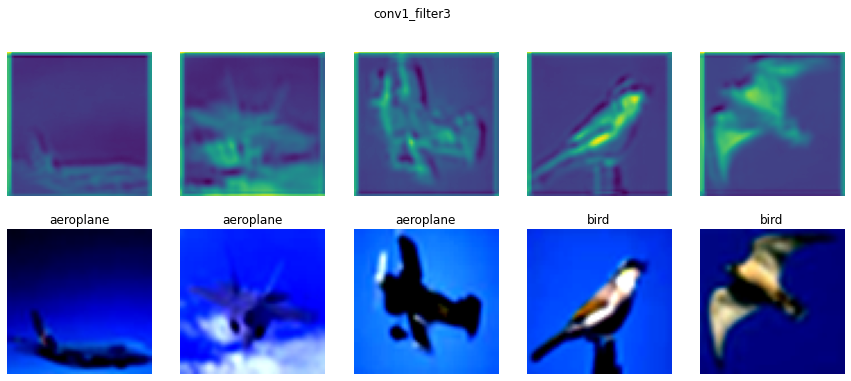

In [ ]:
activation_all_images = activationimages(net, testloader, 10, conv_layers[:3])
        # this act is activation from filter f of layer l of all the 2500 images its shape is 2500*64*64 as shape of 1 feature map is 64*64(for 1 images )
print("act shape" ,activation_all_images.shape)
        
        # act_idx = torch.argsort(torch.Tensor([act[i].norm() for i in range(act.shape[0])]),descending=False)
activation_indexes = torch.argsort(torch.Tensor([activation_all_images[i].norm() for i in range(activation_all_images.shape[0])]),descending=True)
        
        # index of feature maps that has maximum norms 
        # print(act_idx.shape)
fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
for i in range(5):
            # print(activation_indexes[i].shape)
            # print(activation_indexes[i])
            # print(activation_all)m[act_idx[i]].shape)
            # print(act[act_idx[i]])
            # # print(None,:,:)
            # print("imp",act[act_idx[i]].shape)
            # print((act[act_idx[i]])[None,:,:].shape)
            # # imgk=.cpu()
            # imgk=torch.zeros((64,64))
            # print((act[act_idx[i]])[None,:,:][-1,:,:]).shape
            # imshow((act[act_idx[i]])[None,:,:],axes[0,i])
            
            imgk=(activation_all_images[activation_indexes[i]])[None,:,:][-1,:,:].cpu()
            # imgk=imgk.numpy()
            imgk=imgk.numpy()
            imgk = (imgk - np.min(imgk))/abs(np.max(imgk) - np.min(imgk))
            # print(imgk.shape)
            axes[0,i].imshow(imgk)
            axes[0,i].axis("off")
            img, label = testloader.dataset[activation_indexes[i]]
            display(img,axes[1,i],classes[label])
            
plot_name = l + '_filter' + str(f)
plt.suptitle(plot_name)
        #plt.savefig('../images/Filter_'+plot_name+'.png')
fig.savefig(plot_name)
        #plt.show()




In [ ]:

# # activation = {}
# # def get_activation(name):
# #     def hook_fn(model, inp, out):
# #         activation[name] = out.detach()
# #     return hook_fn

# # net.conv1.register_forward_hook(get_activation('conv1'))
# # net.conv2.register_forward_hook(get_activation('conv2'))
# # net.conv3.register_forward_hook(get_activation('conv3'))
# # net.conv4.register_forward_hook(get_activation('conv4'))
# net.conv5.register_forward_hook(get_activation('conv5'))
# # net.conv_block5[0].register_forward_hook(get_activation('conv5'))

# #Compute and store activations for the filter in the specified layer


# import matplotlib.pyplot as plt

# classes, _  = find_classes(test_data_dir)

# # Plot all maximally activated filtermaps
# layer = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5']
# filters = {'conv1' : [3,31], 'conv2' : [4,63], 'conv3' : [5,80], 'conv4' : [100,200], 'conv5' : [10,250]}

# for l in conv_layers:
#     for f in filters[l]:
#         activation_all_images = activationimages(net, testloader, f, l)
#         # this act is activation from filter f of layer l of all the 2500 images its shape is 2500*64*64 as shape of 1 feature map is 64*64(for 1 images )
#         print("act shape" ,activation_all_images.shape)
        
#         # act_idx = torch.argsort(torch.Tensor([act[i].norm() for i in range(act.shape[0])]),descending=False)
#         activation_indexes = torch.argsort(torch.Tensor([activation_all_images[i].norm() for i in range(activation_all_images.shape[0])]),descending=True)
        
#         # index of feature maps that has maximum norms 
#         # print(act_idx.shape)
#         fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
#         for i in range(5):
#             # print(activation_indexes[i].shape)
#             # print(activation_indexes[i])
#             # print(activation_all)m[act_idx[i]].shape)
#             # print(act[act_idx[i]])
#             # # print(None,:,:)
#             # print("imp",act[act_idx[i]].shape)
#             # print((act[act_idx[i]])[None,:,:].shape)
#             # # imgk=.cpu()
#             # imgk=torch.zeros((64,64))
#             # print((act[act_idx[i]])[None,:,:][-1,:,:]).shape
#             # imshow((act[act_idx[i]])[None,:,:],axes[0,i])
            
#             imgk=(activation_all_images[activation_indexes[i]])[None,:,:][-1,:,:].cpu()
#             # imgk=imgk.numpy()
#             imgk=imgk.numpy()
#             imgk = (imgk - np.min(imgk))/abs(np.max(imgk) - np.min(imgk))
#             # print(imgk.shape)
#             axes[0,i].imshow(imgk)
#             axes[0,i].axis("off")
#             img, label = testloader.dataset[activation_indexes[i]]
#             display(img,axes[1,i],classes[label])
            
#         plot_name = l + '_filter' + str(f)
#         plt.suptitle(plot_name)
#         #plt.savefig('../images/Filter_'+plot_name+'.png')
#         fig.savefig(plot_name)
#         #plt.show()




In [ ]:
# data = np.random.randint(low=0,high=255,size=(137,236))
# plt.imshow(data)

In [ ]:
# t = torch.rand(32, 10, 64)[-1, :, :]


# print(t.size()) 


In [ ]:
# # useless
# def train(epoch, trainloader, optimizer, criterion,net):
#     running_loss = 0.0
#     correct=0
#     total=0
#     for i, data in enumerate(tqdm(trainloader), 0):
#         # get the inputs
#         inputs, labels = data
#         if torch.cuda.is_available():
#             inputs, labels = inputs.cuda(), labels.cuda()

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
    

#     print('epoch %d training loss: %.3f' %
#             (epoch + 1, running_loss / (len(trainloader))))
#     print('Accuracy of the network on the train images: %f %%' % (
#                                     100 * correct / total))
#     return (100* correct/total)

    
# ########################################################################
# # Let us look at how the network performs on the test dataset.

# def test(testloader, model):
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for data in tqdm(testloader):
#             images, labels = data
#             if torch.cuda.is_available():
#                 images, labels = images.cuda(), labels.cuda()        
#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
    
#     print('Accuracy of the network on the test images: %f %%' % (
#                                     100 * correct / total))
#     return (100* correct/total)

# #########################################################################
# # get details of classes and class to index mapping in a directory
# def find_classes(dir):
#     classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
#     classes.sort()
#     class_to_idx = {classes[i]: i for i in range(len(classes))}
#     return classes, class_to_idx


# def classwise_test(testloader, model):
# ########################################################################
# # class-wise accuracy

#     classes, _ = find_classes(train_data_dir)
#     n_class = len(classes) # number of classes

#     class_correct = list(0. for i in range(n_class))
#     class_total = list(0. for i in range(n_class))
#     with torch.no_grad():
#         for data in tqdm(testloader):
#             images, labels = data
#             if torch.cuda.is_available():
#                 images, labels = images.cuda(), labels.cuda()        
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             c = (predicted == labels).squeeze()
#             for i in range(4):
#                 label = labels[i]
#                 class_correct[label] += c[i].item()
#                 class_total[label] += 1

#     for i in range(n_class):
#         print('Accuracy of %10s : %2f %%' % (
#             classes[i], 100 * class_correct[i] / class_total[i]))

# print('Start Training')
# os.makedirs('./models', exist_ok=True)
# train_accuracies=[]
# test_accuracies=[]
# val_accuracies=[]

# for epoch in range(num_epochs):  # loop over the dataset multiple times
#     print('epoch ', epoch + 1)
#     train_accuracy=train(epoch, trainloader, optimizer, criterion,net)
#     train_accuracies.append(train_accuracy)
#     val_accuracy=test(valloader, net)
#     val_accuracies.append(val_accuracy)
#     # test_accuracy=test(testloader, net)
#     # test_accuracies.append(test_accuracy)
# #     classwise_test(valloader, net)
#     # save model checkpoint 
#     torch.save(net.state_dict(), './models/model'+str(epoch)+'.pth')      

# print('performing test')
# test_accuracy=test(testloader, net)
# classwise_test(testloader, net)

# print('Finished Training')

# # Saving our trained model
# torch.save(net.state_dict(), './models/bestmodelfilter16.pth')


In [ ]:
# def activationimages(net, testloader, filter_no, layer_no):
#     activation_all_images = None
#     with torch.no_grad():
#         for data in tqdm(testloader):
#             images, labels = data
#             print("images shape " ,images.shape)
#             # images shape is torch.size(4,3,64,64)
#             print(labels.shape)
#             # labels shape is torch.size(4)
#             if torch.cuda.is_available():
#                 images, labels = images.cuda(), labels.cuda()
            
#             outputs = net(images)
#             # outputs shape is torch.size(4,5)
#             print(outputs.shape)
#             # activation[layer_no].shape is torch.size(4,64,64,64)
#             activation_batch = activation[layer_no][:,filter_no]
#             # shape of activation[layer_no][:,filter_no] is torch.size(4,64,64)
#             # output feature map 64*64 due to that partiuclar filter
#             # for all 4 images 
#             # print("imp",activation[layer_name][:,filter_id].shape)
           

#             if activation_all_images == None:
#                 activation_all_images = activation_batch
#             else:
#                 activation_all_images = torch.cat((activation_all_images, activation_batch),dim=0)
#         print(activation_all_images.shape) 
#         # shape of activation_all_images is torch.size(2500,64,64)
#         # output feature map for that particular filter for 2500 images
#     return activation_all_images


In [ ]:
# activation_all_images = activationimages(net, testloader, 10, conv_layers[0])
#         # this act is activation from filter f of layer l of all the 2500 images its shape is 2500*64*64 as shape of 1 feature map is 64*64(for 1 images )
# print("act shape" ,activation_all_images.shape)
        
#         # act_idx = torch.argsort(torch.Tensor([act[i].norm() for i in range(act.shape[0])]),descending=False)
# activation_indexes = torch.argsort(torch.Tensor([activation_all_images[i].norm() for i in range(activation_all_images.shape[0])]),descending=True)
        
#         # index of feature maps that has maximum norms 
#         # print(act_idx.shape)
# fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
# for i in range(5):
#             # print(activation_indexes[i].shape)
#             # print(activation_indexes[i])
#             # print(activation_all)m[act_idx[i]].shape)
#             # print(act[act_idx[i]])
#             # # print(None,:,:)
#             # print("imp",act[act_idx[i]].shape)
#             # print((act[act_idx[i]])[None,:,:].shape)
#             # # imgk=.cpu()
#             # imgk=torch.zeros((64,64))
#             # print((act[act_idx[i]])[None,:,:][-1,:,:]).shape
#             # imshow((act[act_idx[i]])[None,:,:],axes[0,i])
            
#             imgk=(activation_all_images[activation_indexes[i]])[None,:,:][-1,:,:].cpu()
#             # imgk=imgk.numpy()
#             imgk=imgk.numpy()
#             imgk = (imgk - np.min(imgk))/abs(np.max(imgk) - np.min(imgk))
#             # print(imgk.shape)
#             axes[0,i].imshow(imgk)
#             axes[0,i].axis("off")
#             img, label = testloader.dataset[activation_indexes[i]]
#             display(img,axes[1,i],classes[label])
            
# plot_name = l + '_filter' + str(f)
# plt.suptitle(plot_name)
#         #plt.savefig('../images/Filter_'+plot_name+'.png')
# fig.savefig(plot_name)
#         #plt.show()




  0%|          | 0/625 [00:00<?, ?it/s]

images shape  torch.Size([4, 3, 64, 64])
torch.Size([4])
torch.Size([4, 5])


KeyError: ignored